Look at the new stellar density metric

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.metricBundles as metricBundles
import lsst.sims.maf.db as db
import lsst.sims.maf.maps as maps

In [2]:
database = '/Users/olsen/Documents/LSST/CadenceWorkshop/Aug2015/metrics/enigma_1189_sqlite.db'
sqlWhere = 'night < 800' 
opsdb = db.OpsimDatabase(database)
outDir = 'MapExample'
resultsDb = db.ResultsDb(outDir=outDir)

In [31]:
nside = 64

plotDict = {'logScale':True}#{'colorMin':0, 'colorMax':.005}
mafMap = maps.StellarDensityMap()
metric = metrics.StarDensityMetric()
slicer = slicers.HealpixSlicer(nside=nside, useCache=False)
sql = sqlWhere
bundle = metricBundles.MetricBundle(metric,slicer,sql, mapsList=[mafMap], plotDict=plotDict)

Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


In [32]:
bg = metricBundles.MetricBundleGroup({0:bundle},opsdb, outDir=outDir, resultsDb=resultsDb)
bg.runAll()

Querying database with constraint night < 800
Found 554923 visits
Running:  [0]
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


Plotting figures with night < 800 sqlconstraint now.
monopole: 0.0132529  dipole: lon: -98.8472, lat: -3.10307, amp: 0.0216552
Plotting complete.


Optimal bin calculation tried to make 3549 bins, returning 200


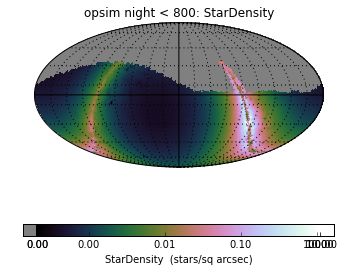

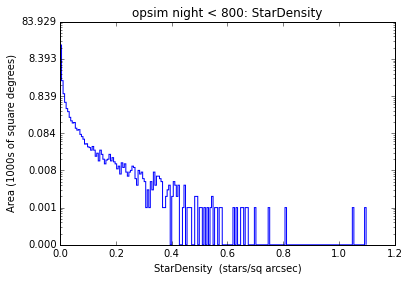

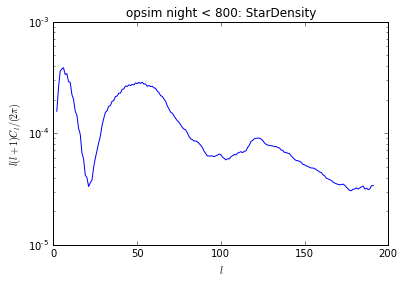

In [33]:
bg.plotAll(closefigs=False)

Querying database with constraint night < 800
Found 554923 visits
Running:  [0]
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with night < 800 sqlconstraint now.
monopole: 0.00169575  dipole: lon: -101.815, lat: -13.1559, amp: 0.00257961
Plotting complete.


Optimal bin calculation tried to make 1057 bins, returning 200


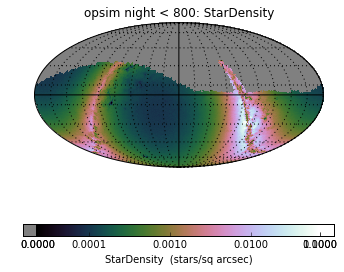

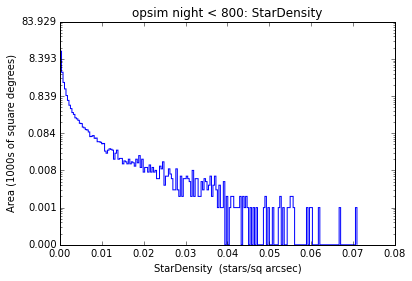

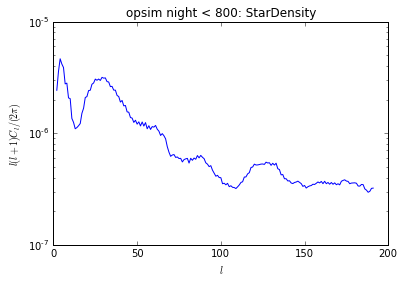

In [34]:
mafMap = maps.StellarDensityMap(rmag=20)
bundle = metricBundles.MetricBundle(metric,slicer,sql, mapsList=[mafMap], plotDict=plotDict)
bg = metricBundles.MetricBundleGroup({0:bundle},opsdb, outDir=outDir, resultsDb=resultsDb)
bg.runAll()
bg.plotAll(closefigs=False)